This file is used to merge all the original datasets into one while performing exploratory data analysis

In [81]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
from termcolor import colored

Import dataframes and take a look

In [94]:
df_ed = pd.read_csv('OriginalData/education.csv')
df_lang = pd.read_csv('OriginalData/languages.csv')
df_skill = pd.read_csv('OriginalData/skills.csv')
df_work = pd.read_csv('OriginalData/work_experiences.csv')

Function to print properties of a dataframe

In [83]:
def check_df(df):
    print("Shape: ",df.shape)
    print("Data Types: ")
    print(df.dtypes)
    print("Head ")
    display(df.head())
    print("Info ")
    print(df.info())
    print("Description ")
    display(df.describe().T)
    print("NaNs ")
    print(df.isnull().sum())
    print("Quantiles ")
    display(df.describe([0, 0.05, 0.50, 0.95, 0.99]).T)
    print("Unique Values in categorical columns")
    cols = df.select_dtypes(include=['object']).columns
    for col in cols:
        print(col, ": " ,df[col].unique().shape[0])
    
    

## Education Data

In [84]:
check_df(df_ed)

Shape:  (142575, 6)
Data Types: 
user_id               int64
school_name          object
degree               object
fields_of_study      object
start_year_month    float64
end_year_month      float64
dtype: object
Head 


,user_id,school_name,degree,fields_of_study,start_year_month,end_year_month
0,0,Anadolu Üniversitesi,NaN,NaN,NaN,NaN
1,0,Adıyaman Üniversitesi,NaN,NaN,NaN,NaN
2,0,Fırat Üniversitesi,NaN,NaN,NaN,NaN
3,1,Fırat Üniversitesi,Yüksek Lisans,Yazılım Mühendisliği,NaN,NaN
4,1,Fırat Üniversitesi,Lisans,Yazılım Mühendisliği,NaN,NaN


Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142575 entries, 0 to 142574
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           142575 non-null  int64  
 1   school_name       142575 non-null  object 
 2   degree            106733 non-null  object 
 3   fields_of_study   122737 non-null  object 
 4   start_year_month  8202 non-null    float64
 5   end_year_month    7590 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 6.5+ MB
None
Description 


,count,mean,std,min,25%,50%,75%,max
user_id,142575.0,33234.221799,19089.852710,0.0,16907.5,33015.0,49636.0,66273.0
start_year_month,8202.0,201589.231041,660.950242,197009.0,201409.0,201809.0,202102.0,202111.0
end_year_month,7590.0,201866.930962,612.396043,197406.0,201708.0,202106.0,202206.0,203009.0


NaNs 
user_id                  0
school_name              0
degree               35842
fields_of_study      19838
start_year_month    134373
end_year_month      134985
dtype: int64
Quantiles 


,count,mean,std,min,0%,5%,50%,95%,99%,max
user_id,142575.0,33234.221799,19089.852710,0.0,0.0,3690.0,33015.0,63249.0,65716.0,66273.0
start_year_month,8202.0,201589.231041,660.950242,197009.0,197009.0,200209.0,201809.0,202110.0,202110.0,202111.0
end_year_month,7590.0,201866.930962,612.396043,197406.0,197406.0,200507.0,202106.0,202407.0,202509.0,203009.0


Unique Values in categorical columns
school_name :  11113
degree :  5889
fields_of_study :  11049


In [102]:
print("There are ", df_ed["user_id"].nunique(), " unique user")

There are  66271  unique user


Take a look at the cateorical columns
- Print each one and take a look in the text editor 

In [85]:
#list =df_ed.degree.unique()
#list = df_ed["fields_of_study"].unique()
list = df_ed["school_name"].unique()
for elem in list:
    #print(elem)

SyntaxError: unexpected EOF while parsing (184973442.py, line 5)

Notes
- Field of study: Need some way to reduce the number of categories by grouping similar objects, (eg all Computer science related subjects)
- Degree: Whole thing is a mess, need to reduce to : Primary, High school, Bachelor, Master, PHD only
- School_name: Maybe categorise into rankings? Eg. 1=School in top 100, 2=in top 200 etc

Take a look at the dates
- Check the distribution of dates
- Check if anyone lacks a starting date but has an end date

In [86]:
cols = df_ed.columns
cols

Index(['user_id', 'school_name', 'degree', 'fields_of_study',
       'start_year_month', 'end_year_month'],
      dtype='object')

In [87]:
# These people only have an end date
df_ed[(df_ed[cols[-2]].isna()) & ~(df_ed[cols[-1]].isna())].shape[0] 

792

In [88]:
# These people only have a start date
df_ed[~(df_ed[cols[-2]].isna()) & (df_ed[cols[-1]].isna())].shape[0] 

1404

In [89]:
# These people only have no date
df_ed[(df_ed[cols[-2]].isna()) & (df_ed[cols[-1]].isna())].shape[0] 

133581

<AxesSubplot: >

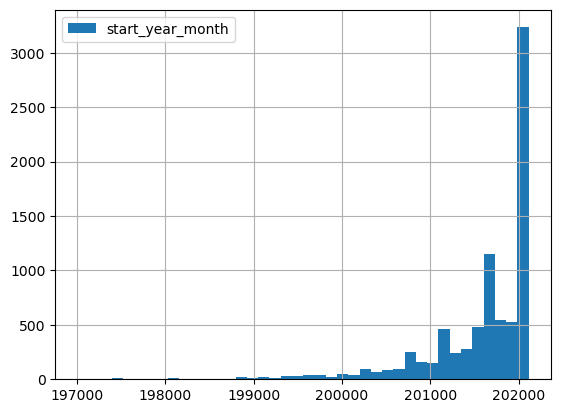

In [90]:
df_ed[cols[-2]].hist(grid="False",bins=40,legend=True)

<AxesSubplot: >

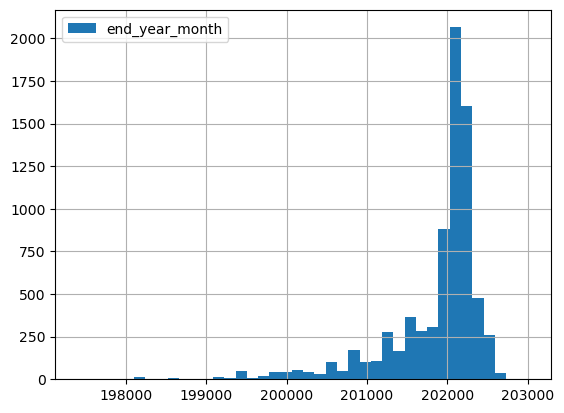

In [91]:
df_ed[cols[-1]].hist(grid="False",bins=40,legend=True)

## Language Data

In [95]:
check_df(df_lang)

Shape:  (76062, 3)
Data Types: 
user_id         int64
language       object
proficiency    object
dtype: object
Head 


,user_id,language,proficiency
0,8,İngilizce,full_professional
1,8,Türkçe,native_or_bilingual
2,8,Fransızca,elementary
3,10,ingilizce,NaN
4,11,Turkish,native_or_bilingual


Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76062 entries, 0 to 76061
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      76062 non-null  int64 
 1   language     76062 non-null  object
 2   proficiency  65401 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
Description 


,count,mean,std,min,25%,50%,75%,max
user_id,76062.0,32981.29965,19103.673868,8.0,16409.0,32061.0,49683.0,66273.0


NaNs 
user_id            0
language           0
proficiency    10661
dtype: int64
Quantiles 


,count,mean,std,min,0%,5%,50%,95%,99%,max
user_id,76062.0,32981.29965,19103.673868,8.0,8.0,4086.05,32061.0,63227.95,65725.0,66273.0


Unique Values in categorical columns
language :  513
proficiency :  6


In [100]:
print("There are ", df_lang["user_id"].nunique(), " unique user")

There are  37290  unique user


In [101]:
df_lang["language"].value_counts()

İngilizce                          20702
English                            14863
Türkçe                             14007
Turkish                             8261
Almanca                             3732
                                   ...  
İngilizce (Upper-Intermediate)         1
Wollof                                 1
Adıge dili                             1
Circassian                             1
Swiss German (Schweizerdeutsch)        1
Name: language, Length: 513, dtype: int64

In [103]:
df_lang["proficiency"].value_counts()

native_or_bilingual     22026
professional_working    18306
elementary               8971
full_professional        8389
limited_working          7709
Name: proficiency, dtype: int64

Notes
- Lots of users lack language data, unsure what to do with them, perhaps assume they don't know a foreign language
- Same languages appear mulitpel times due to inconsistent spelling, merge these
- Ignore obscure languages that 1-2 people speak
- Turn the language data into a categorical variable, like one hot encoding the 5 most popular languages, ignoring the rest, and having a column to mark #lagnauges one knows

## Skills data

In [104]:
check_df(df_skill)

Shape:  (1398443, 2)
Data Types: 
user_id     int64
skill      object
dtype: object
Head 


,user_id,skill
0,1,Mühendislik
1,1,Eğitim
2,2,Android
3,2,Java
4,2,3D Studio Max


Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1398443 entries, 0 to 1398442
Data columns (total 2 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1398443 non-null  int64 
 1   skill    1398443 non-null  object
dtypes: int64(1), object(1)
memory usage: 21.3+ MB
None
Description 


,count,mean,std,min,25%,50%,75%,max
user_id,1398443.0,33077.666533,19259.24418,1.0,16322.0,32949.0,49796.0,66273.0


NaNs 
user_id    0
skill      0
dtype: int64
Quantiles 


,count,mean,std,min,0%,5%,50%,95%,99%,max
user_id,1398443.0,33077.666533,19259.24418,1.0,1.0,3312.0,32949.0,63168.0,65725.0,66273.0


Unique Values in categorical columns
skill :  53025


In [105]:
df_skill["user_id"].nunique()

62402

Notes:
- Some users have no skills, decide whether to mark them as skilless or aveage skilled
- Lots of unique skills, need to put into broad categores, or have a variable to represent number of skills known

## Work Data

In [106]:
check_df(df_work)

Shape:  (187019, 4)
Data Types: 
user_id              int64
company_id           int64
location            object
start_year_month     int64
dtype: object
Head 


,user_id,company_id,location,start_year_month
0,53442,2651,"Istanbul, Turkey",201509
1,34558,815,"Istanbul, Turkey",201210
2,63761,26354,NaN,200010
3,10738,89,NaN,201610
4,8711,3113,"Istanbul, Turkey",201801


Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187019 entries, 0 to 187018
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           187019 non-null  int64 
 1   company_id        187019 non-null  int64 
 2   location          125605 non-null  object
 3   start_year_month  187019 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 5.7+ MB
None
Description 


,count,mean,std,min,25%,50%,75%,max
user_id,187019.0,33570.105909,19327.660769,0.0,16822.0,33465.0,50436.0,66273.0
company_id,187019.0,5331.810329,6411.691207,0.0,890.0,2380.0,7461.0,26885.0
start_year_month,187019.0,201452.024457,448.488659,196103.0,201211.0,201603.0,201805.0,201912.0


NaNs 
user_id                 0
company_id              0
location            61414
start_year_month        0
dtype: int64
Quantiles 


,count,mean,std,min,0%,5%,50%,95%,99%,max
user_id,187019.0,33570.105909,19327.660769,0.0,0.0,3668.0,33465.0,63494.0,65800.00,66273.0
company_id,187019.0,5331.810329,6411.691207,0.0,0.0,76.0,2380.0,20428.0,25380.82,26885.0
start_year_month,187019.0,201452.024457,448.488659,196103.0,196103.0,200603.0,201603.0,201908.0,201911.00,201912.0


Unique Values in categorical columns
location :  6128


In [112]:
print("User count: ", df_work["user_id"].nunique(),
"\nCompany count: ", df_work["company_id"].nunique())



User count:  57079 
Company count:  20837


<AxesSubplot: >

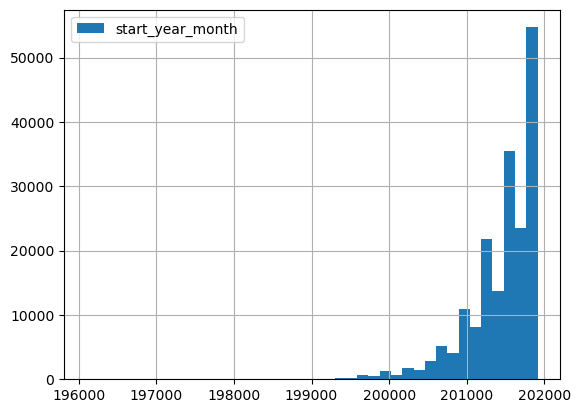

In [114]:
df_work["start_year_month"].hist(grid="False",bins=40,legend=True)

Notes:
- Smt on the forum about ppl starting in 2019 all being marked with the same label (not left), so remove these from the training data
    - First check this is indeed the case, and that none of these users are in the test data
    - Company id is really useless as a predictive feature other than for clustering
    - Location data also too messy, maybe divide to countries